# Goal
Apply gradient descent to minimize the error of a liner regression

In [70]:
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [65]:
# this function iterates over the elements and returns
# true if all of them are below the tolerance threshold
def below_tolerance(movement, tolerance):
	for i in movement:
		if i < 0:
			i = -i
		if i > tolerance:
			return False
	return True

In [66]:
# SSR
#this is the derivative of the cost function, returns the gradient vector
# b0 = derivative in order to the intercept
# b1 = derivative in order to the first parameter
def	gradient_vector(x, y, start):
	deriv = start[0] + start[1] * x - y
	b0 = 2 * deriv.sum()
	b1 = 2 * (deriv * x).sum()
	return b0, b1

At first I used the SSR, but it resulted in a too big step so I changed to the MSE and it seems to be working now

In [67]:
# MSE
#this is the derivative of the cost function, returns the gradient vector
# b0 = derivative in order to the intercept
# b1 = derivative in order to the first parameter
def	gradient_vector(x, y, start):
	deriv = start[0] + start[1] * x - y
	b0 = 2 * deriv.mean()
	b1 = 2 * (deriv * x).mean()
	return b0, b1

Source for gifs: https://www.geeksforgeeks.org/create-an-animated-gif-using-python-matplotlib/

In [78]:
def scatter_plot(x, y):
	fig = plt.figure()
	fig.patch.set_facecolor('white')
	plt.scatter(x, y, c ="blue")
	plt.xlabel("X-axis")
	plt.ylabel("Y-axis")
	plt.show()

In [82]:
def regression(x, y, b0, b1):
	fig = plt.figure()
	fig.patch.set_facecolor('white')
	plt.scatter(x, y, c ="blue")
	plt.plot(x, b0 + b1*x, '--k')
	plt.xlabel("X-axis")
	plt.ylabel("Y-axis")
	plt.show()

In [ ]:
import matplotlib.animation as animation

fig = plt.figure()

#function to pass in the animation
def animate(i, pathToMeas):
    pullData = open(pathToMeas,'r').read()
    dataArray = pullData.split('\n')
    xar = []
    yar = []
    colunmNames = dataArray[0].split(',')
    # my data file had this structure:
    #col1, col2
    #100, 500
    #95, 488
    #90, 456
    #...
    # and this data file can be updated when the script is running
    for eachLine in dataArray[1:]:
        if len(eachLine) > 1:
           x, y = eachLine.split(',')
           xar.append(float(x))
           yar.append(float(y))

   # convert list to array
   xar = np.asarray(xar)
   yar = np.asarray(yar)

   # sort the data on the x, I do that for the problem I was trying to solve.
   index_sort_ = np.argsort(xar)
   xar = xar[index_sort_]
   yar = yar[index_sort_]

   ax1.clear()
   ax1.plot(xar, yar,'-+')
   ax1.set_xlim(0,np.max(xar))
   ax1.set_ylim(0,np.max(yar))

#ani = animation.FuncAnimation(fig, animate, fargs=(args.data,), interval=1000 )
animation.FuncAnimation(fig, animate, fargs=(args.data,), interval=1000 )
plt.show()
plt.close()

In [86]:
# this function returns the parameters b0 and b1 that create the linear regression
# closer to obs_x and obs_y
# the starting point is an initial selection for the parameters that is updated
# until the improvement is marginal (below tolerance) or the model has been run 
# enough times
def gradient_descent(gradient_vector, obs_x, obs_y, starting_point,
		learning_rate=0.0005, max_iter=100, tolerance=0.001):
	position = starting_point
	scatter_plot(obs_x, obs_y)
	if max_iter < 1:
		raise ValueError("The number of iterations should be greater than 0")
	if tolerance < 0:
		raise ValueError("The tolerance can't be negative")
	if learning_rate <= 0:
		raise ValueError("The learning rate has to be greater than 0, otherwise you ain't learning")
	i = 0
	while i < max_iter:
		movement = learning_rate * np.array(gradient_vector(obs_x, obs_y, position))
		if below_tolerance(movement, tolerance):
			break
		position -= movement
		regression(obs_x, obs_y, position[0], position[1])
	return position

The elements must be an np.array because listA + listB will concatenate, while arrayA+arrayB will return an array of the sum of each element (must be the same size)

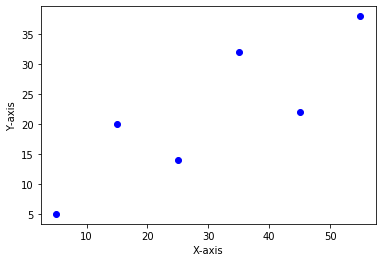

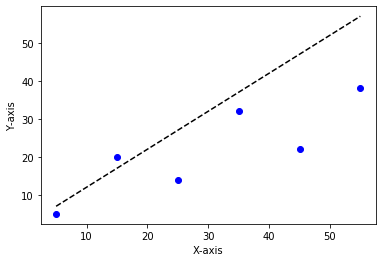

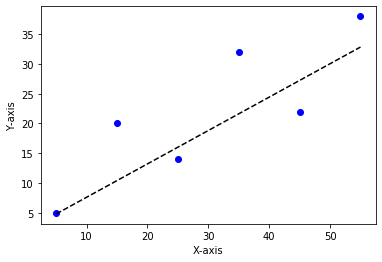

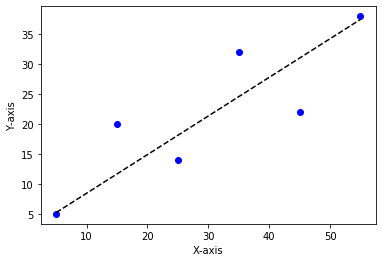

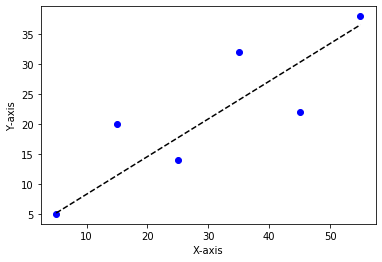

In [87]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

b0, b1 = gradient_descent(gradient_vector = gradient_vector, obs_x = x, obs_y = y,
	starting_point=[2,1])



